# Case-1: features in independent

Setting. The data has 3 features. Only the 1st feature has significant variance.

In [46]:
%matplotlib inline
import sys
sys.path.append('../')
from model_criticism_mmd import ModelTrainerTorchBackend
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas

In [50]:
import numpy
size = 1000
n_epoch = 500
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:800]
y_train = y[:800]
x_val = x[800:]
y_val = y[800:]

In [51]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for

1 dim. mean(x)=1.0 mean(y)=2.5248548771197292 var(x)=0.0 var(y)=2302.8121458816827
2 dim. mean(x)=10.0025778700585 mean(y)=9.999656248911283 var(x)=0.04029090218532031 var(y)=0.03809763318620526
3 dim. mean(x)=9.986457221298988 mean(y)=9.99377833695908 var(x)=0.038718311478458486 var(y)=0.03903903336901691


In [52]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=500, batchsize=200, opt_sigma=False, x_val=x_val, y_val=y_val)
trained_obj.scales

input data N(sample-size)=800, N(dimension)=3
Getting median initial sigma value...
initial sigma by median-heuristics 5.77
Validation at 0. MMD^2 = 0.570378449068937, obj-value = [-2.55274451] at sigma = [5.77303402]
[before optimization] sigma value = [5.77303402]
     5: avg train MMD^2 0.895900140730819 obj [-3.33088924],  avg val MMD^2 0.8683895713933495  obj [-3.30440728]  elapsed: 0.0 sigma: [5.77303402]
    25: avg train MMD^2 0.9627276664674961 obj [-3.82855203],  avg val MMD^2 0.9505839835250025  obj [-3.73772921]  elapsed: 0.0 sigma: [5.77303402]
    50: avg train MMD^2 0.9744422481624296 obj [-4.01698482],  avg val MMD^2 0.9658202623062823  obj [-3.92844643]  elapsed: 0.0 sigma: [5.77303402]
   100: avg train MMD^2 0.985418448491003 obj [-4.25528742],  avg val MMD^2 0.979647658510809  obj [-4.20251889]  elapsed: 0.0 sigma: [5.77303402]
   200: avg train MMD^2 0.9927786826435757 obj [-4.97156057],  avg val MMD^2 0.992474272839823  obj [-4.58691875]  elapsed: 0.0 sigma: [5.77

array([18.80152   ,  0.47757486,  0.02871666], dtype=float32)

As expected, only the 1st feature has a huge weight.

# Case-2: dependency between features

In [33]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [44]:
%matplotlib inline
import sys
sys.path.append('../')
from model_criticism_mmd import ModelTrainerTorchBackend
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas

In [40]:
import numpy
size = 1000
n_epoch = 500
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_dim = x_1st_dim + numpy.full(size, 5)
y_2_dim = y_1st_dim + numpy.full(size, 5)

x_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=size)
y_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=size)

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), 
                       numpy.reshape(x_2_dim, (size, 1)), 
                       numpy.reshape(x_3_dim, (size, 1))], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), 
                       numpy.reshape(y_2_dim, (size, 1)), 
                       numpy.reshape(y_3_dim, (size, 1))], axis=1)

x_train = x[:800]
y_train = y[:800]
x_val = x[800:]
y_val = y[800:]

In [42]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for

1 dim. mean(x)=1.0 mean(y)=2.1910425430340887 var(x)=0.0 var(y)=2447.067672309139
2 dim. mean(x)=6.0 mean(y)=7.191042543034089 var(x)=0.0 var(y)=2447.067672309139
3 dim. mean(x)=9.995718941316799 mean(y)=9.998072262749757 var(x)=0.03785323101657011 var(y)=0.04067125114367236


In [45]:
trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train,num_epochs=500, batchsize=200, opt_sigma=False, x_val=x_val, y_val=y_val)
trained_obj.scales

input data N(sample-size)=800, N(dimension)=3
Getting median initial sigma value...
initial sigma by median-heuristics 21.6
Validation at 0. MMD^2 = 0.5044419288530552, obj-value = [-2.47590033] at sigma = [21.55086058]
[before optimization] sigma value = [21.55086058]
     5: avg train MMD^2 0.652114011931433 obj [-2.70397245],  avg val MMD^2 0.6087357732319278  obj [-2.64780603]  elapsed: 0.0 sigma: [21.55086058]
    25: avg train MMD^2 0.8259701632690684 obj [-3.11592114],  avg val MMD^2 0.7848342584701159  obj [-3.0577062]  elapsed: 0.0 sigma: [21.55086058]
    50: avg train MMD^2 0.8788659961303843 obj [-3.32156548],  avg val MMD^2 0.849867934575372  obj [-3.23360533]  elapsed: 0.0 sigma: [21.55086058]
   100: avg train MMD^2 0.9186596405940634 obj [-3.51536248],  avg val MMD^2 0.8941404974608519  obj [-3.37122516]  elapsed: 0.0 sigma: [21.55086058]
   200: avg train MMD^2 0.9481940664973482 obj [-3.72848956],  avg val MMD^2 0.919975789315546  obj [-3.50063765]  elapsed: 0.0 sigma

array([ 9.71038   , 12.313313  ,  0.16370258], dtype=float32)

We observe that a weight on both 1st dimenstion and 2nd dimenstion.

# Case-3: independency in high dimenstional features

In [119]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [120]:
%matplotlib inline
import sys
sys.path.append('../')
from model_criticism_mmd import ModelTrainerTorchBackend
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas

In [121]:
import numpy as np
size = 1000
n_epoch = 500
batch_size = 200
n_dim = 100
n_dim_without_var = 60

# dims without variable. only the y has the variable.
x_fixed = np.random.normal(loc=1.0, scale=1.0, size=(1000, n_dim))
__y_fixed = np.random.normal(loc=1.0, scale=1.0, size=(1000, n_dim_without_var))

y_vars = np.full((size, n_dim - n_dim_without_var), 0.0)
for i_dim in range(0, (n_dim - n_dim_without_var)):
    __y_vars = np.random.normal(loc=5.0, scale=i_dim, size=size)
    y_vars[:,i_dim] = __y_vars
# end for

y_fixed = np.append(__y_fixed, y_vars, axis=1)

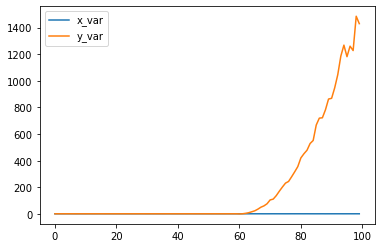

In [122]:
__var_rows = []
for i_dim in range(0, n_dim):
    __var_rows.append({'x_var': np.var(x_fixed[:, i_dim]), 'y_var': np.var(y_fixed[:, i_dim])})
df_var = pandas.DataFrame(__var_rows)
ax = df_var.plot.line()

In [123]:
x_train = x_fixed[:800]
x_val = x_fixed[800:]
y_train = y_fixed[:800]
y_val = y_fixed[800:]

trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train,num_epochs=500, batchsize=200, opt_sigma=False, x_val=x_val, y_val=y_val)
trained_obj.scales

input data N(sample-size)=800, N(dimension)=100
Getting median initial sigma value...
initial sigma by median-heuristics 59.2
Validation at 0. MMD^2 = 0.2882417533220959, obj-value = [-3.48312805] at sigma = [59.21238382]
[before optimization] sigma value = [59.21238382]
     5: avg train MMD^2 0.3560267713394678 obj [-3.66712195],  avg val MMD^2 0.37334483246361094  obj [-3.71430089]  elapsed: 0.0 sigma: [59.21238382]
    25: avg train MMD^2 0.932770168845845 obj [-5.36996491],  avg val MMD^2 0.9423240778409127  obj [-5.62120088]  elapsed: 0.0 sigma: [59.21238382]
    50: avg train MMD^2 0.9702847332828607 obj [-7.40958487],  avg val MMD^2 0.9701453948174323  obj [-7.35786666]  elapsed: 0.0 sigma: [59.21238382]
   100: avg train MMD^2 0.9712813478551697 obj [-7.44180528],  avg val MMD^2 0.9710216788210815  obj [-7.37594572]  elapsed: 0.0 sigma: [59.21238382]
   200: avg train MMD^2 0.9720971663233542 obj [-7.47050839],  avg val MMD^2 0.9717108399840103  obj [-7.36537904]  elapsed: 0.0

array([0.69521964, 0.14211892, 0.7328118 , 0.54734653, 0.24521899,
       0.4737339 , 0.14979535, 0.08467272, 0.2763375 , 0.02084546,
       0.22540279, 0.57424873, 0.31864098, 0.09181193, 0.42446235,
       0.55783737, 0.3688243 , 0.20359911, 0.6350636 , 0.8457222 ,
       0.6705942 , 0.68365616, 0.83355784, 0.5527182 , 0.1456452 ,
       0.37783203, 0.65310264, 0.3961055 , 0.16877988, 0.13379227,
       0.13443923, 0.42356554, 0.7418364 , 0.24809283, 0.16840145,
       0.25069436, 0.12313462, 0.70400983, 0.2588649 , 0.58418447,
       0.4432209 , 0.485843  , 0.41925877, 0.70734376, 0.49597746,
       0.12975545, 0.73402697, 0.06311794, 0.65686226, 0.25856966,
       0.5721221 , 0.24616536, 0.16323109, 0.42402762, 0.03242798,
       0.57456815, 0.44832766, 0.3538259 , 0.37891346, 0.27782056,
       0.2692552 , 0.5143244 , 0.4785905 , 1.0547364 , 0.32936972,
       0.82267845, 0.6080145 , 0.5247724 , 0.7090746 , 1.3993685 ,
       1.278578  , 1.7184392 , 1.1131122 , 0.20117922, 1.65240

[Text(0.5, 0, 'dimenstion')]

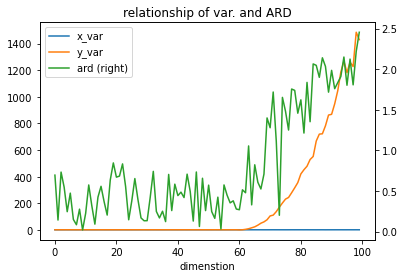

In [124]:
s_ard = pandas.Series(trained_obj.scales)
s_ard.name = 'ard'
df_var_ard = pandas.concat([df_var, s_ard], axis=1)
ax = df_var_ard.plot(secondary_y='ard', title='relationship of var. and ARD')
ax.set(xlabel='dimenstion')

# Case-4: independency in high dimenstional features

In [125]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [126]:
%matplotlib inline
import sys
sys.path.append('../')
from model_criticism_mmd import ModelTrainerTorchBackend
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas

In [134]:
import numpy as np
size = 1000
n_epoch = 500
batch_size = 200
n_dim = 100
n_dim_without_var = 60

# dims without variable. only the y has the variable.
__x_fixed = np.random.normal(loc=1.0, scale=1.0, size=(1000, n_dim_without_var))
__y_fixed = np.random.normal(loc=1.0, scale=1.0, size=(1000, n_dim_without_var))

y_vars = np.full((size, n_dim - n_dim_without_var), 0.0)
# half of y-dim follows normal distribution
for i_dim in range(0, int((n_dim - n_dim_without_var) / 2)):
    __y_vars = np.random.normal(loc=5.0, scale=i_dim, size=size)
    y_vars[:,i_dim] = __y_vars
# end for

# half of y-dim is plus constant value
for i_dim in range(0, int((n_dim - n_dim_without_var) / 2)):
    y_vars[:,(i_dim*2)] = y_vars[:,i_dim] + np.random.normal(loc=5.0, scale=0.5, size=size)
# end for

# ---
x_cols = np.full((size, n_dim - n_dim_without_var), 0.0)
# half of x-dim follows normal distribution
for i_dim in range(0, int((n_dim - n_dim_without_var) / 2)):
    __x_vec = np.random.normal(loc=5.0, scale=0.0, size=size)
    x_cols[:,i_dim] = __x_vec
# end for

# half of x-dim is plus constant value
for i_dim in range(0, int((n_dim - n_dim_without_var) / 2)):
    x_cols[:,(i_dim*2)] = x_cols[:,i_dim] + np.random.normal(loc=5.0, scale=0.5, size=size)
# end for

# ---
y_fixed = np.append(__y_fixed, y_vars, axis=1)
x_fixed = np.append(__x_fixed, x_cols, axis=1)

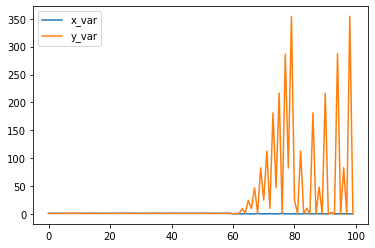

In [135]:
__var_rows = []
for i_dim in range(0, n_dim):
    __var_rows.append({'x_var': np.var(x_fixed[:, i_dim]), 'y_var': np.var(y_fixed[:, i_dim])})
df_var = pandas.DataFrame(__var_rows)
ax = df_var.plot.line()

In [136]:
x_train = x_fixed[:800]
x_val = x_fixed[800:]
y_train = y_fixed[:800]
y_val = y_fixed[800:]

trainer = ModelTrainerTorchBackend()
trained_obj = trainer.train(x_train, y_train, num_epochs=1000, batchsize=200, opt_sigma=False, x_val=x_val, y_val=y_val)

input data N(sample-size)=800, N(dimension)=100
Getting median initial sigma value...
initial sigma by median-heuristics 22.7
Validation at 0. MMD^2 = 0.3100573115438371, obj-value = [-2.9803727] at sigma = [22.72050458]
[before optimization] sigma value = [22.72050458]
     5: avg train MMD^2 0.4118188565152022 obj [-3.1374622],  avg val MMD^2 0.43039155729195633  obj [-3.17836561]  elapsed: 0.0 sigma: [22.72050458]
    25: avg train MMD^2 0.8766338309847213 obj [-4.31570346],  avg val MMD^2 0.876495630034214  obj [-4.38767188]  elapsed: 0.0 sigma: [22.72050458]
    50: avg train MMD^2 0.9386985748348825 obj [-5.99820141],  avg val MMD^2 0.9378626159333204  obj [-5.9854062]  elapsed: 0.0 sigma: [22.72050458]
   100: avg train MMD^2 0.9553619843876033 obj [-6.71313655],  avg val MMD^2 0.9553685826559399  obj [-6.75135897]  elapsed: 0.0 sigma: [22.72050458]
   200: avg train MMD^2 1.001821121066025 obj [-9.21174737],  avg val MMD^2 1.0018417495872418  obj [-9.21218043]  elapsed: 0.0 sig

[Text(0.5, 3.1999999999999993, 'dimenstion')]

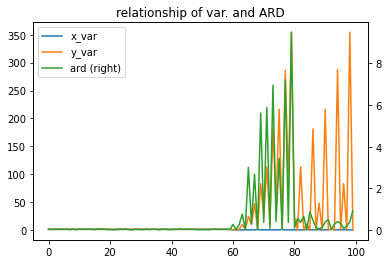

In [137]:
s_ard = pandas.Series(trained_obj.scales)
s_ard.name = 'ard'
df_var_ard = pandas.concat([df_var, s_ard], axis=1)
df_var_ard.plot(secondary_y='ard', title='relationship of var. and ARD')
ax.set(xlabel='dimenstion')